# **Haberman's Cancer Patient Survival Prediction / Classification :**

**<h3>Real World Problem :</h3>**

Given a Patient, Predict whether he/she survives for 5 years or more.

or

Given a Patient, Classify it survival status based on it's survival chances.

## **Import the Libraries :**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#To clear warnings
import warnings 
warnings.filterwarnings("ignore") 

## **Read the Data :**

In [ ]:
# Read from csv

hb = pd.read_csv('/content/haberman.csv')

hb

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## **Class Distribution :**

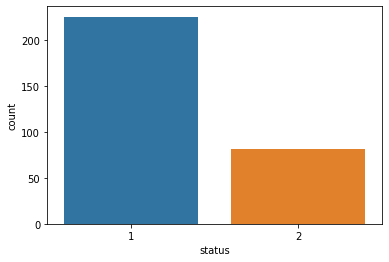

In [ ]:
sns.countplot(x='status',data=hb)

* **Observation :**

    * We have a Class Imbalanced Dataset.
    * Most of the Patient's survived for 5 years & more.

## **Machine Learning Problem :**

**Problem :**    Given a Datapoint, Classify the Survival Status

  i.e.  1 - Survived for 5 years & more  ;           2 - Died within 5 years


**Constraints :**

  * Imbalanced Dataset
  * Numerical Features

## **Train-Test Split :**

Train - 70% , Test - 30%

In [ ]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# Split the Data :

hb_train, hb_test = train_test_split(hb, test_size=0.30, random_state=42)

In [ ]:
print('Original dataset :',hb.shape)
print('Train dataset :',hb_train.shape)
print('Test dataset :',hb_test.shape)

Original dataset : (306, 4)
Train dataset : (214, 4)
Test dataset : (92, 4)


In [ ]:
# Input Features :

X_train = hb_train.loc[:,['age','year','nodes']]
X_test = hb_test.loc[:,['age','year','nodes']]

In [ ]:
# Target Class Labels :

y_train = hb_train.loc[:,['status']] 
y_test = hb_test.loc[:,['status']]

## **Machine Learning Models :**

* K-NN (K-Nearest Neighbors) Classifier
* Naive Bayes Classifier
* Decision Tree Classifier

**1) K-NN Classifier:**

In [ ]:
# Import KNN Classifier :

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Model :

knn = KNeighborsClassifier()

# Train the KNN model:

knn.fit(X_train,y_train)

# Test the Model :

yknn_pred = knn.predict(X_test)
yknn_pred_prob = knn.predict_proba(X_test)

In [ ]:
yknn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2])

**2) Naive Bayes Classifier :**

In [ ]:
# Import the Naove Bsyes Classofer :

from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes Model :

naivebayes = GaussianNB()           

# Train the Model :

naivebayes.fit(X_train,y_train)

#  Test the Model :

ynb_pred = naivebayes.predict(X_test)

In [ ]:
ynb_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1])

**3) Decision Tree Classifier :**

In [ ]:
# Import the Decision Tree Classifier : 

from sklearn.tree import DecisionTreeClassifier

# Initialize the Classifier :

dtree = DecisionTreeClassifier(random_state=0)

# Train our Classifier :

dtree.fit(X_train,y_train)

# Test the Model :

ydtree_pred = dtree.predict(X_test)

In [ ]:
ydtree_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2])

## **Performance Metrics :**

* Accuracy
* F1-Score
* Confusion Matrix

In [ ]:
# Import the Metrics :

from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

**1) Accuracy :**

In [ ]:
print('Accuracy Scores : \n')
print("K-NN : ",accuracy_score(y_test,yknn_pred))
print("Naive Bayes  : ",accuracy_score(y_test,ynb_pred))
print("Decision Tree : ",accuracy_score(y_test,ydtree_pred))

Accuracy Scores : 

K-NN :  0.782608695652174
Naive Bayes  :  0.7282608695652174
Decision Tree :  0.6304347826086957


**2) F1 Score :**

In [ ]:
print('F1 Scores : \n')
print("K-NN : ",f1_score(y_test,yknn_pred))
print("Naive Bayes  : ",f1_score(y_test,ynb_pred))
print("Decision Tree : ",f1_score(y_test,ydtree_pred))

F1 Scores : 

K-NN :  0.8611111111111112
Naive Bayes  :  0.8251748251748252
Decision Tree :  0.75


**3) Confusion Matrix :**

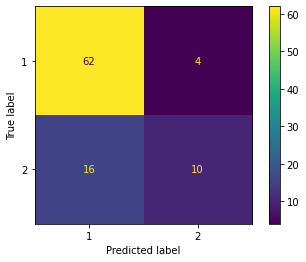

In [ ]:
# K-NN :

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

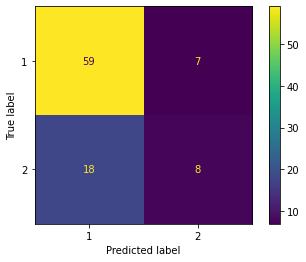

In [ ]:
# Naive Bayes :

plot_confusion_matrix(naivebayes, X_test, y_test)
plt.show()

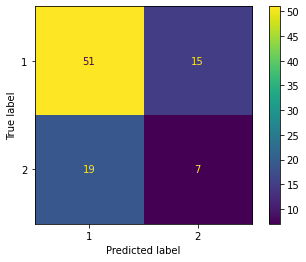

In [ ]:
# Decision Tree :

plot_confusion_matrix(dtree, X_test, y_test)
plt.show()